# Multi Y Axis with twinx 
____

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt
import webbrowser
from IPython.display import YouTubeVideo

C:\Users\PC\Miniconda2\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [13]:
style.use('fivethirtyeight')

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

MA1 = 10
MA2 = 30
def moving_average(values, window):
    weights = np.repeat(1.0, window) / window
    smas    = np.convolve(values, weights, 'valid')
    return smas

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 1, colspan = 1)
    plt.title(stock)
    plt.ylabel('H-L')
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan = 4, colspan = 1, sharex = ax1) # share xaxis with ax1  
    plt.ylabel('Price')
    # same x axis but different y axis
    ax2v = twinx()
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1) # share xaxis with ax1
    plt.ylabel('MAvgs')
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1m/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})
    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
    ma1 = moving_average(closep, MA1)
    ma2 = moving_average(closep, MA2)
    start = len(date[MA2 - 1:])
    
    h_1 = list(map(lambda x, y: x - y, highp, lowp))
    
    ax1.plot_date(date[-start:], h_1[-start:],'-')
    ax1.yaxis.set_major_locater(mticker.MaxNLocator(nbins = 4, prune = 'lower'))
    
    candlestick_ohlc(ax2, ohlc[-start:], width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax2.xaxis.get_ticklabels():
        label.set_rotation(45)

   
    ax2.yaxis.set_major_locater(mticker.MaxNLocator(nbins = 7, prune = 'upper'))
    ax2.grid(True)
    bbox_props = dict(boxstyle = 'round', fc = 'w', ec = 'k', lw = 1)
    ax2.annotate(str(closep[-1], (date[-1], closep[-1]), 
                  xytext = (date[-1] + 4, closep[-1]), bbox = bbox_props)
    font_dict = {'family':'serif', 'color': 'dark red', 'size':15}
    ax2.text(date[10], closep[1],'Text Example', fontdict = font_dict)
    ax2.annotate('Big News', (date[11], highp[11]), xytext = (0.8, 0.9), textcoords = 'axes fraction',
                arrowprops = dict(facecolor = 'grey', color = 'grey'))
    # have fill
    ax2v.fill_between(date[-start:], 0, volume[-start:], facecolor = '#0079a3', alpha = 0.4)
    ax2v.axes.yaxis.set_ticklabels([])#set to nothing
    ax2v.grid(False)# remove grid
    ax2v.set_ylim(0, 3*volum.max())# scaled
    ax3.plot(date[-start:], ma1[-start:], linewidth = 1)
    ax3.plot(date[-start:], ma2[-start:], linewidth = 1)          
    ax3.fill_between(date[-start:], ma1[-start:], 
                     ma2[-start:], where = (ma1[-start:] < ma2[-start:]), 
                     facecolor = 'r', edgecolor = 'r', alpha = 0.5)  
    ax3.fill_between(date[-start:], ma1[-start:], 
                     ma2[-start:], where = (ma1[-start:] > ma2[-start:]), 
                     facecolor = 'g', edgecolor = 'g', alpha = 0.5)
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax3.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax3.yaxis.set_major_locater(mticker.MaxNLocator(nbins = 5, prune = 'lower'))
    for label in ax3.xaxis.get_ticklabels():
        label.set_rotation(45)                 
                 
    plt.setp(ax1.get_xticklabels(), visibile = False)
    plt.setp(ax2.get_xticklabels(), visibile = False)  
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('ebay')

SyntaxError: invalid syntax (<ipython-input-13-5380bd5e7363>, line 91)

In [17]:
webbrowser.open('https://pythonprogramming.net/share-x-axis-sharex-matplotlib-tutorial/')

True

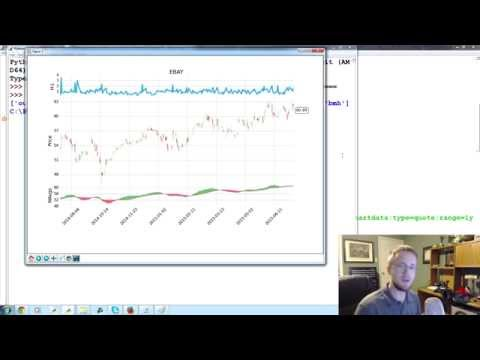

In [2]:
YouTubeVideo('UlygQI2eSdg')

summary from the vid
1. multiple y axis 
2. how to have a subplot which has two types data on it and with different scales(they are not normalized)
3. Example of this price and volume
4. made another axis ax2v(ax2 volume)
5. ax2v = ax2.twinx() (sharing same xaxis and separate y axis)
6. chose 0 why on for the fill ---> thats the least amount of volume for a company
7. There was y axis info that poped up on the right side (*info for the volume*)
8. removed by being set to an empty list also no grid for the volume plot
9. Double checked with GOOG, he didnt like it(ugly) 
10. GOOG took to much space dont want that
11. solution to scale the y axis
12. explained whats going on for the y scaling
13. setting the limits of the y axis
14. the high the multiple to volume the smaller the graph
15. check video at 11.14 for clear explanation